<a href="https://colab.research.google.com/github/shubhamdhobale/machine-learning/blob/main/Classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [35]:
data = pd.read_csv('SMSSpamCollection', sep = '\t', names=['labels','text'])

In [8]:
import nltk
import sklearn

In [38]:
data

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
data.shape

(5572, 2)

In [40]:
!pip install nltk

In [42]:
import nltk

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
sent = 'Hello friends! How are you? We will learning python today'

In [55]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'We',
 'will',
 'learning',
 'python',
 'today']

In [56]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [57]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [58]:
clean

['Hello', 'friends', '!', 'How', '?', 'We', 'learning', 'python', 'today']

In [59]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]

In [60]:
clean

['hello', 'friend', '!', 'how', '?', 'we', 'learn', 'python', 'today']

In [61]:
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [word for word in tokens if word.isdigit() or word.isalpha()
  ]
  clean = [ps.stem(word) for word in clean if word not in swords]
  print(clean)


In [62]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']


In [77]:
#pre-Processing
from sklearn.feature_extraction.text import TfidfVectorizer



In [78]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [79]:
x = data['text']
y = data['labels']

In [86]:
x.shape

(5572,)

In [87]:
y.shape

(5572,)

In [89]:
x_new = Tfidf.fit_transform(x)

In [90]:
x_new.shape

(5572, 8055)

In [98]:
tfidf.get_feature_names()

AttributeError: ignored

In [99]:
y.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [100]:
#Cross-Validation
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x_new , y , random_state=0, test_size=0.25)

In [102]:
x_train.shape

(4179, 8055)

In [104]:
x_test.shape

(1393, 8055)

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
nb = GaussianNB()

In [108]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [109]:
y_pred = nb.predict(x_test.toarray())

In [110]:
y_test.value_counts()

ham     1208
spam     185
Name: labels, dtype: int64

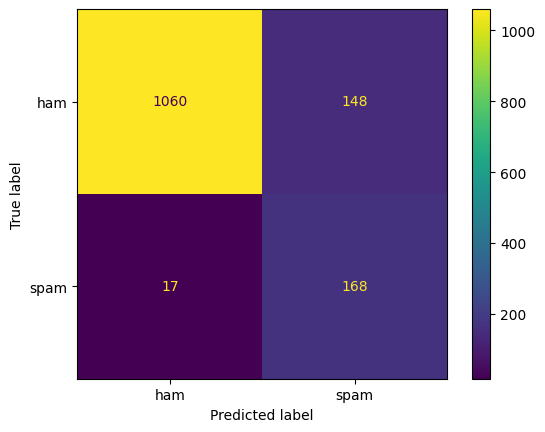

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [112]:
from sklearn.metrics import accuracy_score, classification_report

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1208
        spam       0.53      0.91      0.67       185

    accuracy                           0.88      1393
   macro avg       0.76      0.89      0.80      1393
weighted avg       0.92      0.88      0.89      1393



In [114]:
accuracy_score(y_test, y_pred)

0.8815506101938263

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier(random_state=0)

In [117]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [118]:
y_pred = rf.predict(x_test)

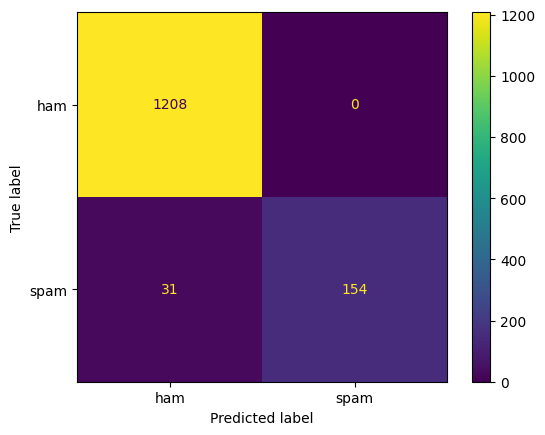

In [119]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [120]:
accuracy_score(y_test, y_pred)

0.9777458722182341

In [121]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)

0.9605168700646087

In [122]:
#Hyper Parameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_features' : ['sqrt','log2'],
    'random_state' : [0,1,2,3,4],
    'class_weight' : ['balenced','balenced_subsample']
}

In [142]:
grid = GridSearchCV(rf ,param_grid=param_grid , cv=5 , scoring='accuracy')

In [143]:
grid.fit(x_train , y_train)

ValueError: ignored

In [148]:
rf = grid_search.best_estimator_

NameError: ignored

In [149]:
y_pred = rf.predict(x_test)

In [150]:
accuracy_score(y_test,y_pred)

0.9777458722182341